# Распознавание предметов одежды при помощи полносвязной нейронной сети

In [ ]:
##WRITE YOUR CODE HERE
import torch
import random
import numpy as np
from torch import nn
from sklearn.model_selection import train_test_split
from torchvision import datasets


random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

Загрузим набор данных FashionMNIST:

In [ ]:
FashionMNIST_train = datasets.FashionMNIST('./', train=True, download=True)
FashionMNIST_test = datasets.FashionMNIST('./', train=False, download=True)

100%|██████████| 26421880/26421880 [00:09<00:00, 2690096.47it/s] 


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 276581.60it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4992089.72it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21148165.52it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



Разделим данные на тестовые и тренировочные множества:

In [ ]:
X_train = FashionMNIST_train.data
y_train = FashionMNIST_train.targets
X_test = FashionMNIST_test.data
y_test = FashionMNIST_test.targets

Посмотрим на тип данных:

In [ ]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

Переведём их в тип float:

In [ ]:
X_train = X_train.float()
X_test = X_test.float()

Узнаем размерности получившихся четырёх множеств:

In [ ]:
print(X_train.shape,
y_train.shape,
X_test.shape,
y_test.shape)

torch.Size([60000, 28, 28]) torch.Size([60000]) torch.Size([10000, 28, 28]) torch.Size([10000])


Выведем на экран одно из изображений:

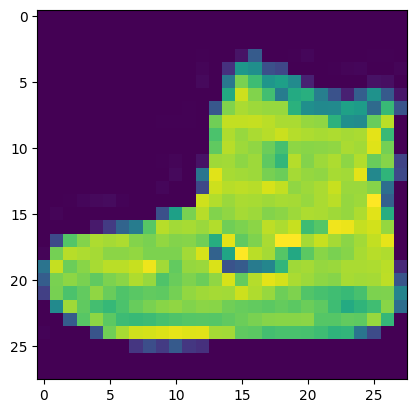

tensor(9)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

Изменим размерности, чтобы выполнялось последующее матричное умножение:

In [ ]:
X_train = torch.reshape(X_train, [-1, 28 * 28])
X_test = torch.reshape(X_test, [-1, 28 * 28])

In [ ]:
X_train.shape

torch.Size([60000, 784])

Напишем класс для нейронной сети, она будет состоять из входного слоя с последующей функцией активации сигмоидой и входного слоя:

In [ ]:
class FashionMNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(FashionMNISTNet, self).__init__()
        self.forw_seq = nn.Sequential(
            nn.Linear(784, n_hidden_neurons),
            nn.Sigmoid(),
            nn.Linear(n_hidden_neurons, 10)
            )

    def forward(self, x):
        x = self.forw_seq(x)
        return x

Создадим экземпляр класса с 90 нейронами на скрытом слое:

In [ ]:
fashion_mnist_net = FashionMNISTNet(90)

In [ ]:
#Определим функцию потерь через кросс-энтропию, а в качестве оптимизатора возьмём Adam с шагом обучения 0,001.

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(fashion_mnist_net.parameters(), lr=1.0e-3)

Обучим нашу нейронную сеть:

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

#X_test = X_test.to(device)
#y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))

    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes] #.to(device)
        y_batch = y_train[batch_indexes] #.to(device)

        preds = fashion_mnist_net.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = fashion_mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.7313)
tensor(0.7372)
tensor(0.7571)
tensor(0.7672)
tensor(0.7353)
tensor(0.7510)
tensor(0.7729)
tensor(0.7495)
tensor(0.7630)
tensor(0.7825)
tensor(0.7317)
tensor(0.7584)
tensor(0.7748)
tensor(0.7856)
tensor(0.7918)
tensor(0.7904)
tensor(0.7854)
tensor(0.7843)
tensor(0.7976)
tensor(0.7971)
tensor(0.7939)
tensor(0.7618)
tensor(0.7716)
tensor(0.7833)
tensor(0.7837)
tensor(0.7825)
tensor(0.7876)
tensor(0.7978)
tensor(0.7855)
tensor(0.7879)
tensor(0.7876)
tensor(0.8056)
tensor(0.7901)
tensor(0.7883)
tensor(0.7840)
tensor(0.7837)
tensor(0.7974)
tensor(0.7984)
tensor(0.7904)
tensor(0.8035)
tensor(0.7899)
tensor(0.7985)
tensor(0.7999)
tensor(0.7935)
tensor(0.8030)
tensor(0.7973)
tensor(0.7904)
tensor(0.8070)
tensor(0.8066)
tensor(0.7818)
tensor(0.7901)
tensor(0.8005)
tensor(0.7860)
tensor(0.8013)
tensor(0.7913)
tensor(0.7892)
tensor(0.7934)
tensor(0.7688)
tensor(0.7681)
tensor(0.7817)
tensor(0.8020)
tensor(0.8002)
tensor(0.7924)
tensor(0.7870)
tensor(0.8095)
tensor(0.8022)
tensor(0.8

Выведем на экран значения точности и потерь:

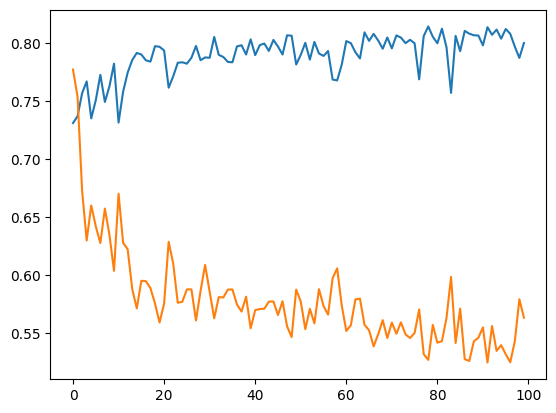

In [ ]:
with torch.no_grad():
    plt.plot(test_accuracy_history)
    plt.plot(test_loss_history)

<font color='green'><b>Полезные (и просто интересные) материалы:</b></font> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html